# Exploring Unsupervised Learning

<hr>

### K-Means Clustering
<b>
K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.</b>
<hr>

<hr>

### Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

%matplotlib inline

<hr>

### Loading and Reading Data

In [2]:
iris_df = pd.read_csv('..\\dataset\\Iris.csv')
# Let's check first 5 rows in the Dataframe
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### As we don't want `Id` column, we'll remomve them from df.

In [3]:
# Columns to be removed
col_rem = ['Id']
# Removing columns
df = iris_df.drop(col_rem,1)
# Let's check first 5 rows in the Dataframe
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Finding optimum number of clusters for K-Means (Elbow Method)

In [4]:
# Finding the optimum number of clusters for K-Means Classification

x = df.iloc[:, [0, 1, 2, 3]].values

clu = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                   n_init = 10, random_state = 0)
    kmeans.fit(x)
    clu.append(kmeans.inertia_)


### Ploting the results obtaind in Elbow Method

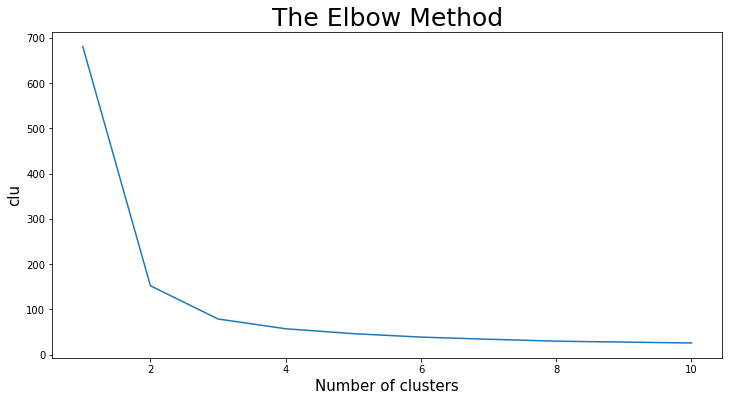

In [5]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),clu)
plt.title("The Elbow Method",fontsize = 25)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('clu', fontsize = 15) # Within cluster sum of squares
plt.show()

<b>It can be clearly seen why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (clu) doesn't decrease significantly with every iteration.

#### From this we choose the number of clusters as '3'.

<hr>

### Creating K-Means classifier

In [6]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300,
               n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

<hr>

### Ploting results obtained by the number of clusters as 3

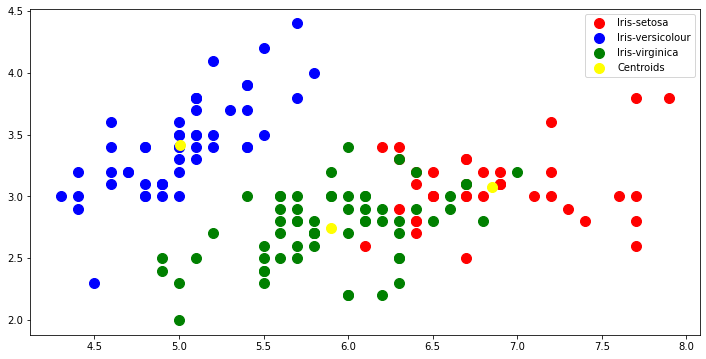

In [7]:
plt.figure(figsize=(12,6))
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## This concludes the K-Means Clustering